# Tensorflow 2.0 - Linear regression

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Create Data

Before creating a simple linear regression,
We need to data.

In this code, we generate ramdom data using the below code.

**Data Information**
- Number of data: 1000
- Y = 0.1X + 0.3 + noise(half of x's range)

In [2]:
import numpy as np
num_points = 1000
vectors_set = []
for i in range(num_points):
    x= np.random.normal(0.0, 0.55)
    y= x * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x, y])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

## Check This Data

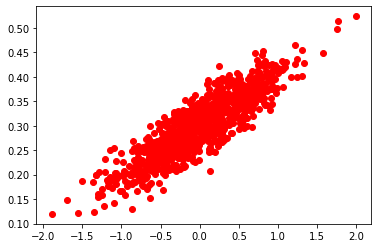

In [11]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro', label='Original data')
plt.show()

# Set Hypothesis for machine learning

We want linear regression. And linear regression expressed
<code>H = Wx + b</code>

So You must set to W, b and Hypothesis.

In [4]:
# if you want set 0 to value, use tf.zeros.
# Usually these variables are initialized randomly. 
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

@tf.function
def forward(x):
    return W * x + b

print("W :", W)
print("b :", b)

W : <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.2983749], dtype=float32)>
b : <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


# Define Loss and Gradient Function

We need to define loss function for gradient and performance measurement.

Next, We need to create graident_descent function.

It performs differential about W, b using loss for global optimization.


In [5]:
def loss(predicted_y, desired_y):
    # [(SUM of all element ((predicted_y - y)^2)] / n
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [6]:
def gradient_descent(inputs, outputs, learning_rate):
    # GradientTape is record all computed process. -> It is used to gradient.
    with tf.GradientTape() as t:
        current_loss = loss(forward(inputs), outputs)
    dW, db = t.gradient(current_loss, [W, b])
    W.assign_sub(learning_rate * dW)
    b.assign_sub(learning_rate * db)

# Train model (3 times only)

Check that the loss value is decreased and changed H(Hypothesis)


In [7]:
import matplotlib.pyplot as plt
def display_graph():
    plt.plot(x_data, y_data, 'ro')
    plt.plot(x_data, W * x_data + b)
    plt.show()

Loss 0.0062723653


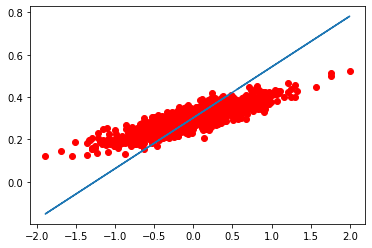

Loss 0.0036532832


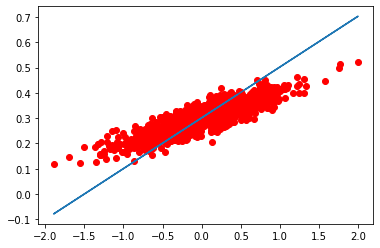

Loss 0.0023038466


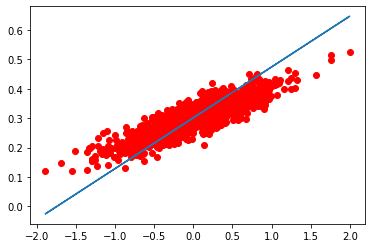

In [8]:
for i in range(3):
    gradient_descent(x_data, y_data, 0.5)
    print("Loss", loss(forward(x_data), y_data).numpy())
    display_graph()

## More...

i=0, loss = 0.001608572667464614
i=1, loss = 0.0012503451434895396
i=2, loss = 0.0010657742386683822
i=3, loss = 0.000970677356235683
i=4, loss = 0.0009216805920004845
i=5, loss = 0.0008964356384240091
i=6, loss = 0.0008834285545162857
i=7, loss = 0.0008767271065153182
i=8, loss = 0.0008732742280699313
i=9, loss = 0.0008714951109141111
i=10, loss = 0.0008705783984623849
i=11, loss = 0.000870106159709394
i=12, loss = 0.0008698629098944366
i=13, loss = 0.0008697375888004899
i=14, loss = 0.000869672920089215
i=15, loss = 0.0008696396253071725
i=16, loss = 0.0008696225704625249
i=17, loss = 0.0008696136646904051
i=18, loss = 0.0008696091244928539
i=19, loss = 0.0008696067379787564
i=20, loss = 0.0008696055156178772
i=21, loss = 0.0008696049335412681
i=22, loss = 0.0008696045260876417
i=23, loss = 0.0008696045260876417
i=24, loss = 0.0008696044678799808
i=25, loss = 0.0008696042932569981
i=26, loss = 0.0008696042932569981
i=27, loss = 0.000869604351464659
i=28, loss = 0.0008696044096723199


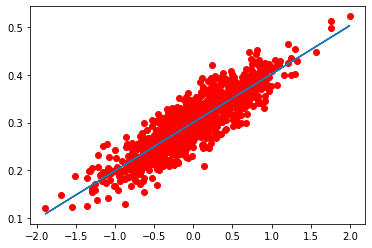

In [9]:
for i in range(30):
    gradient_descent(x_data, y_data, 0.5)
    print("i={0}, loss = {1}".format(i,loss(forward(x_data), y_data).numpy()))
display_graph()

# Check Result

The H(model) we got is:

In [10]:
print("Y = {0:.3}X + {1:.3}".format(W[0].numpy(), b[0].numpy()))
print("Loss = {0}".format(loss(forward(x_data), y_data).numpy()))

Y = 0.102X + 0.3
Loss = 0.0008696042350493371


### Reference
- https://tensorflow.blog/2-%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-%EC%84%A0%ED%98%95-%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D-first-contact-with-tensorflow/
- https://www.tensorflow.org/tutorials/customization/custom_training
- https://tensorflow.org/guide/migration_guide?hl=ko
- https://www.tensorflow.org/tutorials/customization/autodiff?hl=ko